<a href="https://colab.research.google.com/github/yangyeji2020311166/ML/blob/main/USL_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     |████████████████████████████████| 540 kB 4.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=5ea1b81f6cdc2e3e84def16796976e724f748b3bcb6553125a0fb04f2b2df48a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


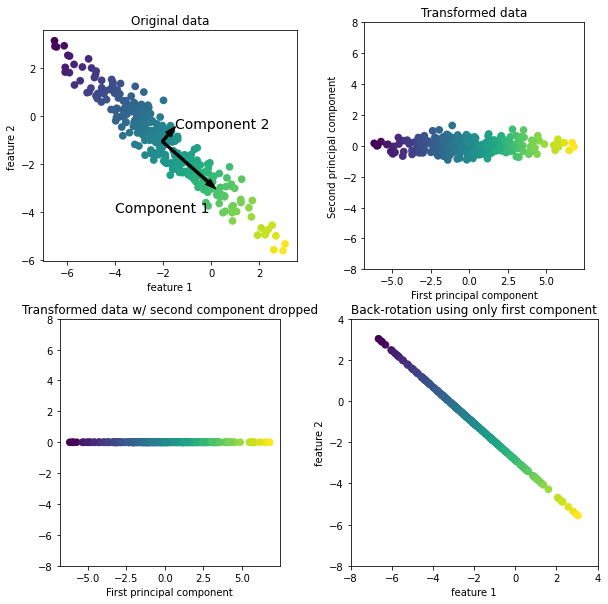

In [1]:
!pip install mglearn
import mglearn
# [Example1 of PCA] 다음 그림은 인위적으로 만든 2차원 데이터셋을 사용하여 PCA효과를 나타낸 것
mglearn.plots.plot_pca_illustration()

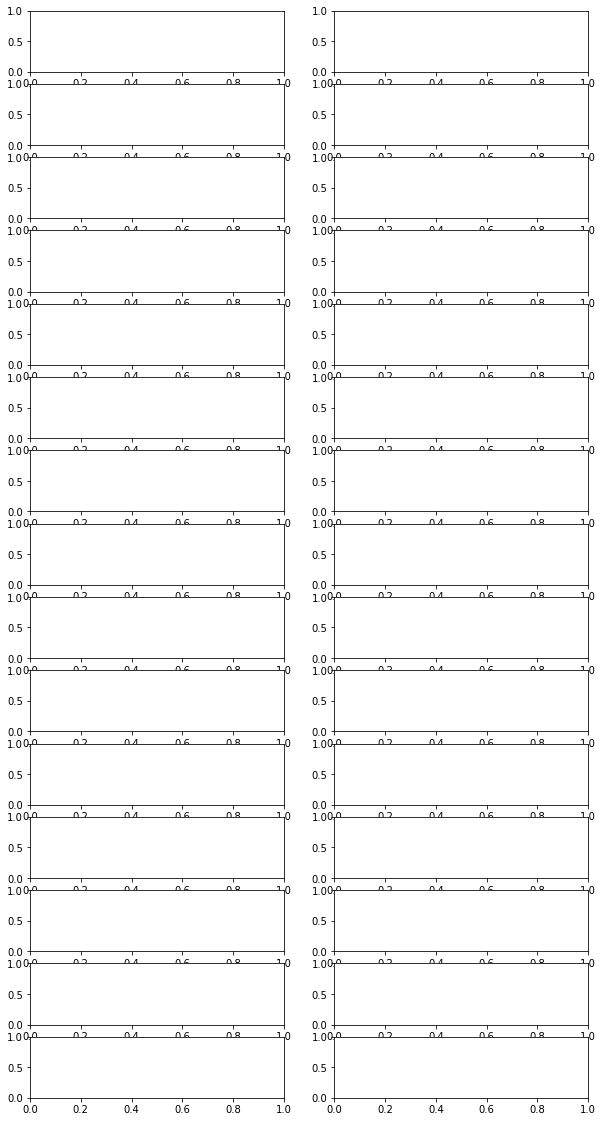

In [2]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(15,2,figsize=(10,20))

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

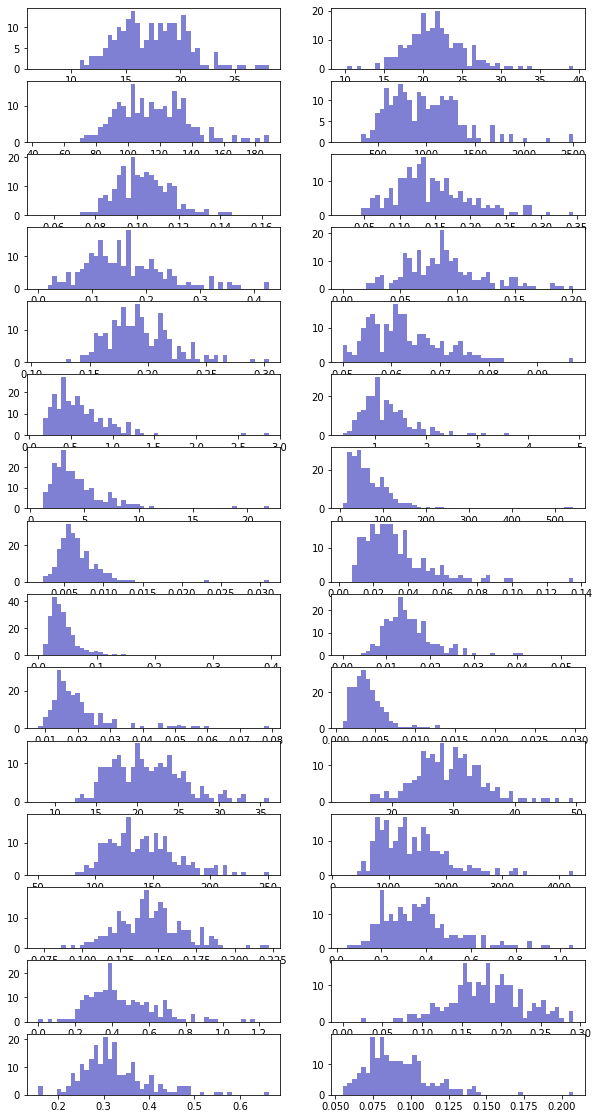

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig,axes=plt.subplots(15,2,figsize=(10,20))

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=50)
  ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)

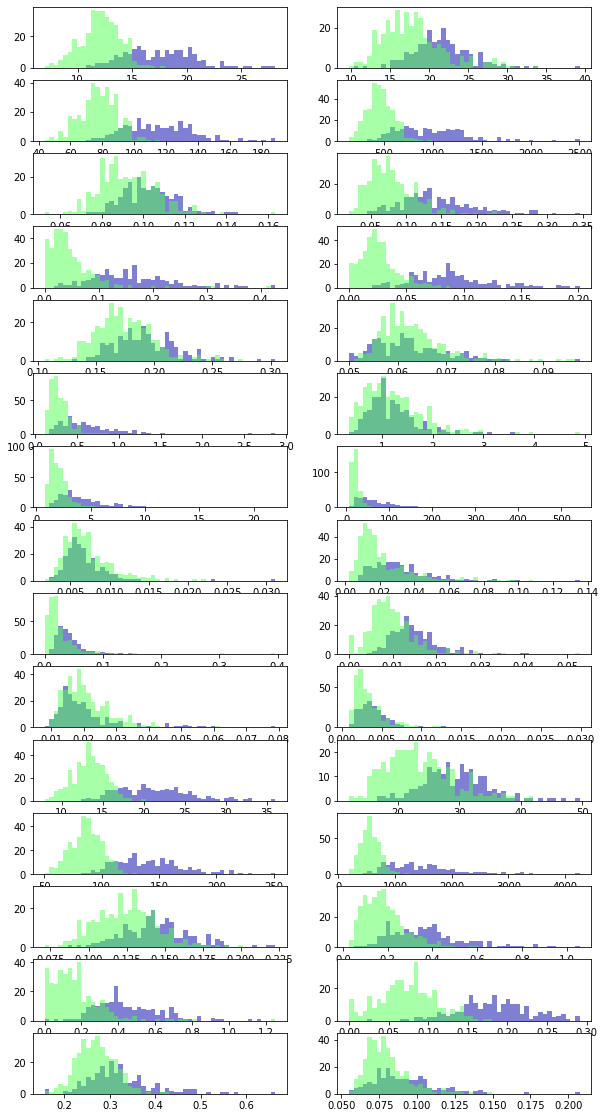

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig,axes=plt.subplots(15,2,figsize=(10,20))

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=50)
  ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
  ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)

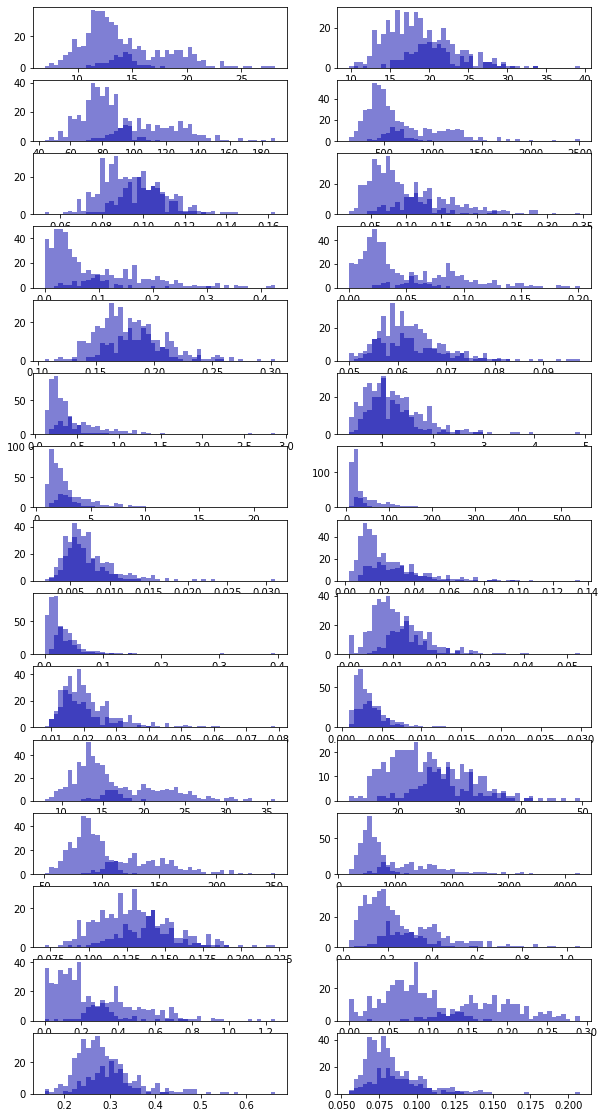

In [5]:
import matplotlib.pyplot as plt
import numpy as np
fig,axes=plt.subplots(15,2,figsize=(10,20))

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=50)
  ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
  ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)

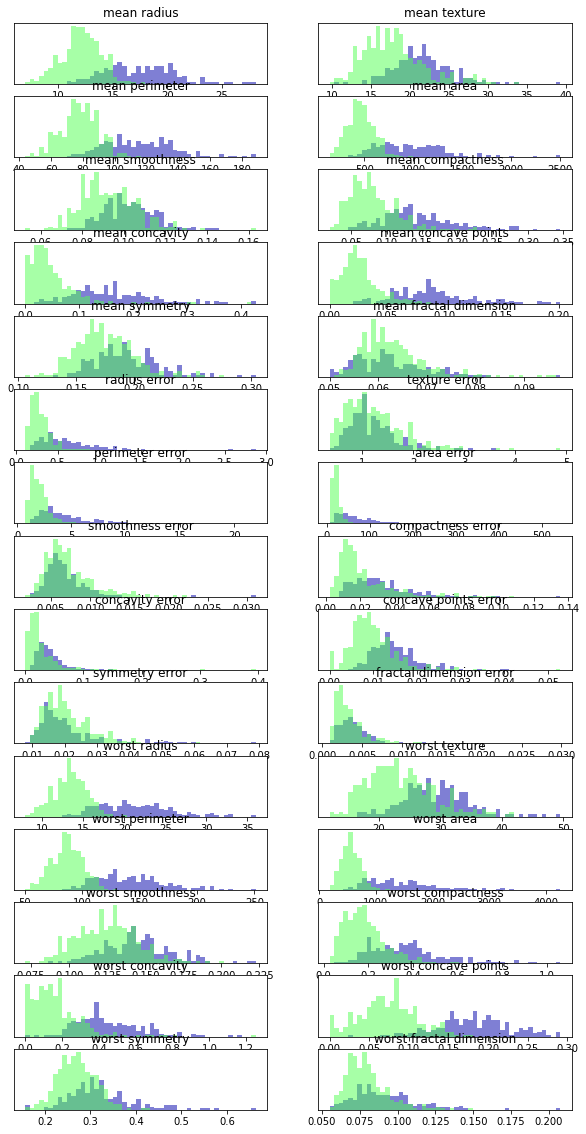

In [6]:
import matplotlib.pyplot as plt
import numpy as np
fig,axes=plt.subplots(15,2,figsize=(10,20))

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=50)
  ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
  ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())

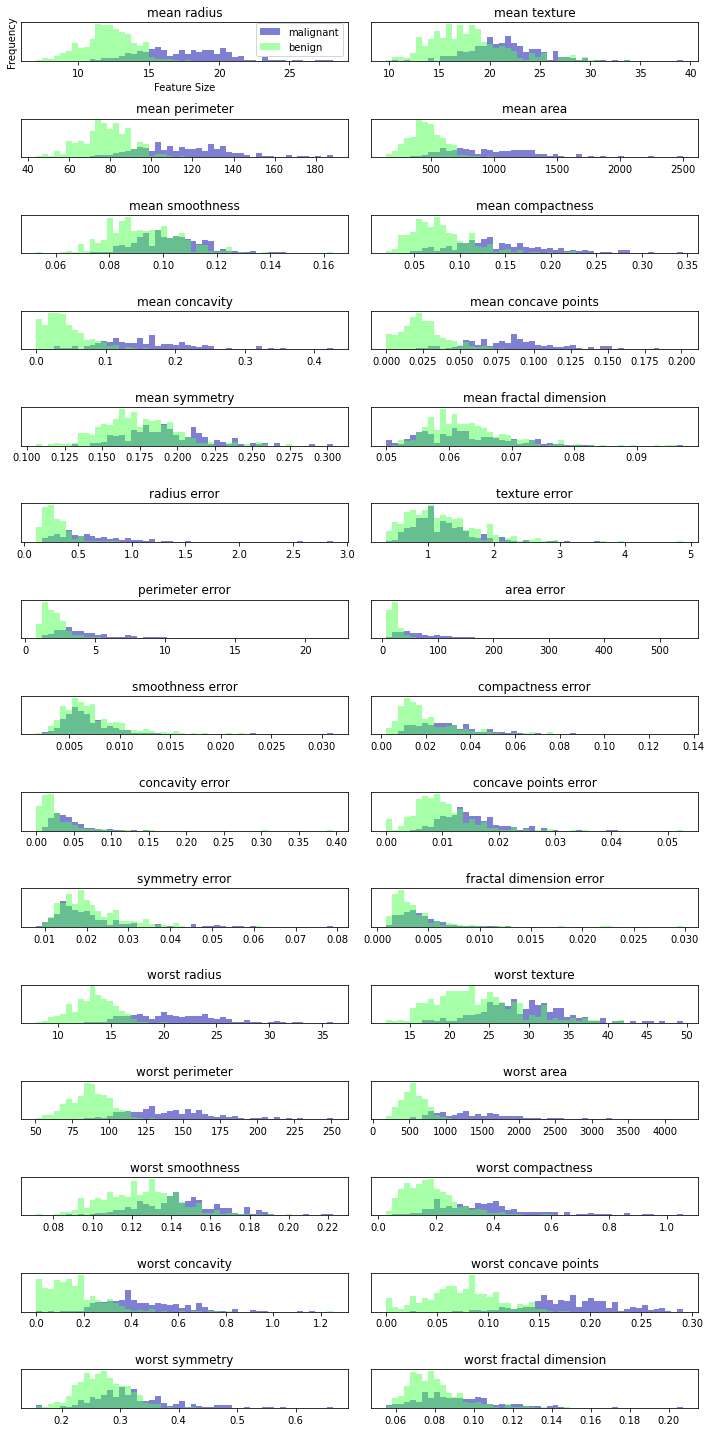

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig,axes=plt.subplots(15,2,figsize=(10,20))

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
  # 각 특성에 대한 히스토그램으로 특정 간격(bin이라고 부름)에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센 것
  _,bins=np.histogram(cancer.data[:,i],bins=50)
  ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
  ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
  
ax[0].set_xlabel("Feature Size")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()
# 각 그래프는 히스토그램 두 개를 겹쳐놓은 것으로 초록색은 양성 클래스의 포인트를, 푸른색은 악성 클래스의 포인트를 나타냄.
# 특성들이 클래스별로 어떻게 분포되어 있는지를 알려주고, 이를 통해 어떤 특성이 양성과 악성 샘플을 구분하는데 더 좋은지 가늠해볼 수 있음.
# 예) "smoothness error"특성은 두 히스토그램이 거의 겹쳐져 별로 쓸모가 없음. 
# 예) "worst concave points"는 두 히스토그램이 확실히 구분되어 매우 유용한 특성임.

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, 'PCA2')

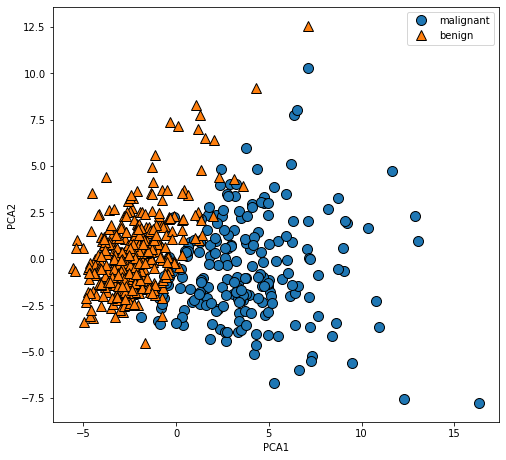

In [8]:
# [Example2 of PCA] 

# PCA를 사용하면 특성간 주요 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지 찾아낼 수 있기 때문에 2차원 시각화도 가능
# 예) 처음 두 개의 주성분을 찾아 2차원 공간에 하나의 산점도로 데이터를 시각화해볼 수 있음.
# PCA를 적용하려면 특성의 스케일이 서로 다르면 올바른 주성분 방향을 찾을 수 없으니 표쥰값으로 변환/스케일을 조정해야함.
# 예) StandardScaler - 각 특성의 분산이 1이 되도록 함.

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)
X_scaled

from sklearn.decomposition import PCA
pca=PCA(n_components=2) #데이터의 처음 두 개 주성분만 유지시킴
pca.fit(X_scaled) # cancer data로 PCA모델을 만듬
X_pca=pca.transform(X_scaled) # 처음 두 개의 주성분을 사용해 데이터를 변환

print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

plt.figure(figsize=(8,8))
!pip install mglearn
import mglearn
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)

plt.legend(["malignant","benign"],loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

In [9]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [10]:
print("PCA 주성분 형태:", pca.components_)

PCA 주성분 형태: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'PCA')

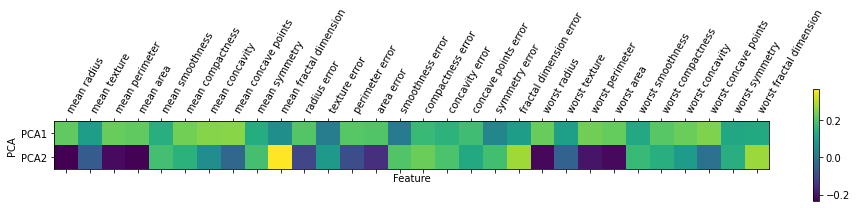

In [11]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["PCA1","PCA2"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("PCA")
# PCA1의 모든 특성은 부호가 같음. (모두 양수라서 모든 특성 사이에 공통된 상호관계가 있다는 뜻이지만, 
# 앞서 언급한 대로 PCA의 화살표 방향은 의미가 없음.)

In [12]:
# [Example3 of PCA]
from sklearn.datasets import fetch_lfw_people 
people=fetch_lfw_people(min_faces_per_person=20, resize=0.7)
#print("people:", people)
print("people.DESCR",people.DESCR)

people.DESCR .. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented

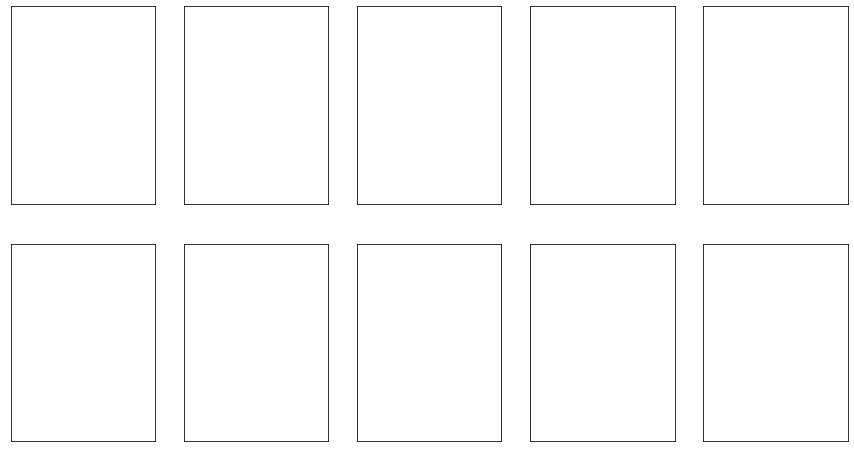

In [13]:
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(), 'yticks':()})

In [14]:
for target,image,ax in zip(people.target,people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

people.images.shape: (3023, 87, 65)
클래스 개수: 62


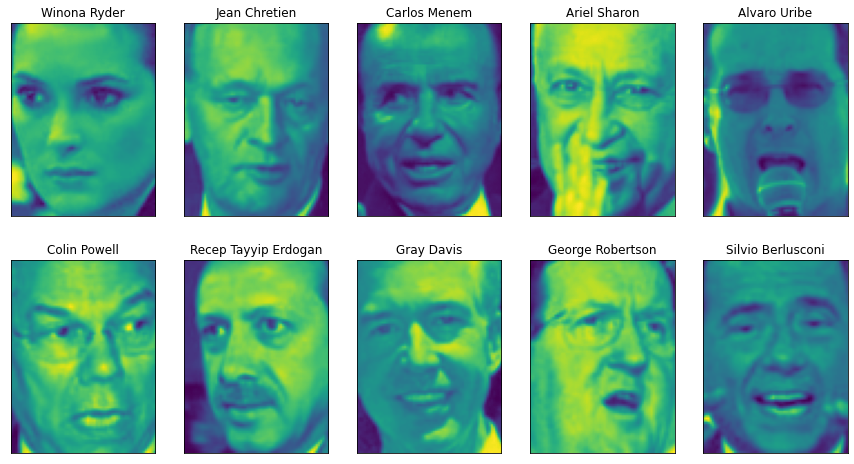

In [15]:
fig,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(), 'yticks':()})
for target,image,ax in zip(people.target,people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])
# 62명의 얼굴을 찍은 이미지가 총 3,023개가 있으며 각 이미지의 크기는 87x65픽셀
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

In [16]:
# 각 타깃이 나타난 횟수 계산
counts=np.bincount(people.target)

# 타깃별 이름과 횟수 출력
for i, (count,name) in enumerate(zip(counts,people.target_names)):
  print("{0:25} {1:3}".format(name,count),end='    ')
  if(i+1) %3 == 0:
    print()

# 이 데이터셋은 조금 편중되어 있어서 다음과 같이 조지 부시와 콜린 파월의 이미지가 많음.

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [17]:


# 총 3023개의 이미지를 쉽게 다루기 위한 mask변수를 모두 False로 초기화
mask=np.zeros(people.target.shape,dtype=np.bool)
print("mask:", mask)
print("mask.shape:", mask.shape)
# 3023개의 각 이미지의 라벨(클래스, 예: 62명의 얼굴, 0~61사이의 숫자)를 출력후 확인
print(people.target)
print(people.target.shape)
#print(people.target_names)

# # 총 3,023개의 이미지에서 중복되는 경우는 제외하고 62명의 얼굴만 추려냄
for target in np.unique(people.target):
  #print("target in for loop",target)
  # 데이터의 편중을 없애기 위해서 사람마다 50개의 이미지만 선택.
  # 이렇게 하지 않으면, 조시 부시에 치우친 특성만 추출됨.
  mask[np.where(people.target==target)[0][:50]] = 1

print("mask:", mask)
X_people=people.data[mask]
print("X_people:", X_people)
print("X_people.shape", X_people.shape)

y_people=people.target[mask]
print("y_people:", y_people)
print("y_people.shape", y_people.shape)

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정함.
# MinMaxScaler를 적용하는 것과 같은 효과를 냄
X_people=X_people/255.

print("X_people/255:", X_people)
print("X_people/255.shape", X_people.shape)

# 얼굴인식이라 하면 통상적으로 새로운 얼굴 이미지가 데이터베이스에 있는 기존 얼굴 중 하나에 속하는지 찻는 것
# 예) 사진 애플리케이션, 소셜 미디어, 보안 애플리케이션등
# 해결책1) 각 사람을 서로 다른 클래스로 구분하는 분류기를 만드는 것 --> 하지만 각 사람에 대한 이미지가 부족


mask: [False False False ... False False False]
mask.shape: (3023,)
[61 25  9 ... 14 15 14]
(3023,)
mask: [ True  True  True ... False False False]
X_people: [[ 57.         60.333332   78.        ...  17.333334   16.666666
   22.666666 ]
 [ 66.666664   80.666664   88.666664  ...   8.666667    8.333333
    9.333333 ]
 [ 18.666666   14.333333   15.        ...  22.666666   22.666666
   25.666666 ]
 ...
 [ 36.333332   22.333334   28.        ...  14.333333    6.6666665
    5.3333335]
 [ 54.         65.333336   56.333332  ... 209.66667   210.
  212.33333  ]
 [110.666664  128.33333   145.33333   ...  14.         14.
   13.666667 ]]
X_people.shape (2063, 5655)
y_people: [61 25  9 ...  9 37 22]
y_people.shape (2063,)
X_people/255: [[0.22352941 0.23660131 0.30588236 ... 0.06797386 0.06535947 0.08888888]
 [0.2614379  0.31633985 0.3477124  ... 0.03398693 0.03267974 0.03660131]
 [0.07320261 0.05620915 0.05882353 ... 0.08888888 0.08888888 0.10065359]
 ...
 [0.14248365 0.0875817  0.10980392 ... 0.056

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [18]:
# 해결책2) 대규모 모델을 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가할 수 있어야 함. 
# -- 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾는 1-최근접 이웃 분류기를 사용

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people,stratify=y_people, random_state=0)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test,y_test)))

# 결과: 정확도가 23%, 클래스 62개를 분류하는 문제에서 아주 나쁜 결과는 아니지만 (예: 무작위로 분류시 정확도- 1/62=1.6%)
# 그렇다고 매우 좋은 결과도 아님. 4번에 1번 꼴로만 올바르게 분류되는 수준...

# 또한, 얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에서 계산하는 것 
# (예: 픽셀을 사용해서 2개의 이미지 비교- 각 픽셀의 회색톤 값을 다른 이미지에서 동일한 위치에 있는 픽셀값과 비교 시) 한계점존재
# [1] 픽셀 비교시 얼굴 위치가 한 픽셀만 오른쪽으로 이동해도 큰 차이를 만듬. --> 완전 다른 얼굴로 인식될 수 있음.
# [2] 픽셀 비교는 사람이 얼굴 이미지 인식하는 것과 많이 다르고 픽셀비교로 얼굴의 특징을 찾아내기 어려움

# 결과, PCA으로 변환하여 거리를 계산하면 정확도가 높아질것으로 예상됨.
# 예) PCA의 화이트닝(whitening, 백색화 옵션)을 사용하여 PCA의 스케일이 같아지도록 조정함. (StandardScaler와 같은 효과)

1-최근접 이웃의 테스트 세트 점수: 0.23


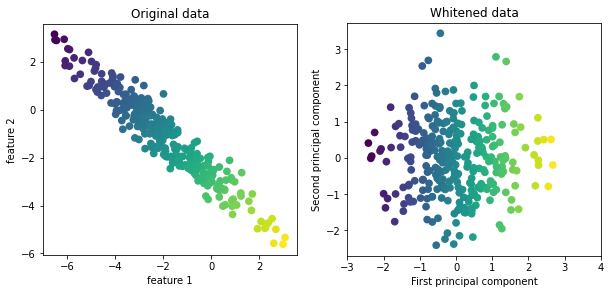

In [19]:
# PCA whitening 시각화
mglearn.plots.plot_pca_whitening()

In [20]:
# PCA객체를 훈련 데이터로 학습시켜서 처음 100개의 주성분을 추출
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
# 주성분으로 변환된 훈련데이터와 테스트데이터를 반환
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca.shape:",X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [21]:
 # 새 데이터는 처음 100개의 주성분에 해당되는 특성을 가지고 있기에 해당 데이터를 활용하여
 # kNN으로 이미지를 분류
 knn=KNeighborsClassifier(n_neighbors=1)
 knn.fit(X_train_pca,y_train)
 print("테스트 세트 정확도:{:.2f}".format(knn.score(X_test_pca,y_test)))
 # 모델의 정확도가 23%에서 31%로 크게 향상되었으므로 주성분이 데이터를 더 잘 표현한다고 판단

테스트 세트 정확도:0.31


In [22]:
# 주성분 해석1) 주성분은 원본 데이터에 있는/입력 데이터 공간
# (i.e., 입력 차원: 87x65=5,655픽셀의 흑백 이미지, 5,655개의 각 픽셀은 0~1사이의 회색톤 값을 가지고 있는 하나의 차원)
# 에서의 어떤 방향이기에 87x65=5,655픽셀의 흑백 이미지이고, 대응하는 여러 특성이 조합된 형태이기에 매우 복잡
# 하지만, 이미지 데이터일 경우엔 계산한 주성분을 쉽게 시각화해볼 수 있음
# 몇 개의 주성분을 시각화
print("pca.components_.shape",pca.components_.shape)

pca.components_.shape (100, 5655)


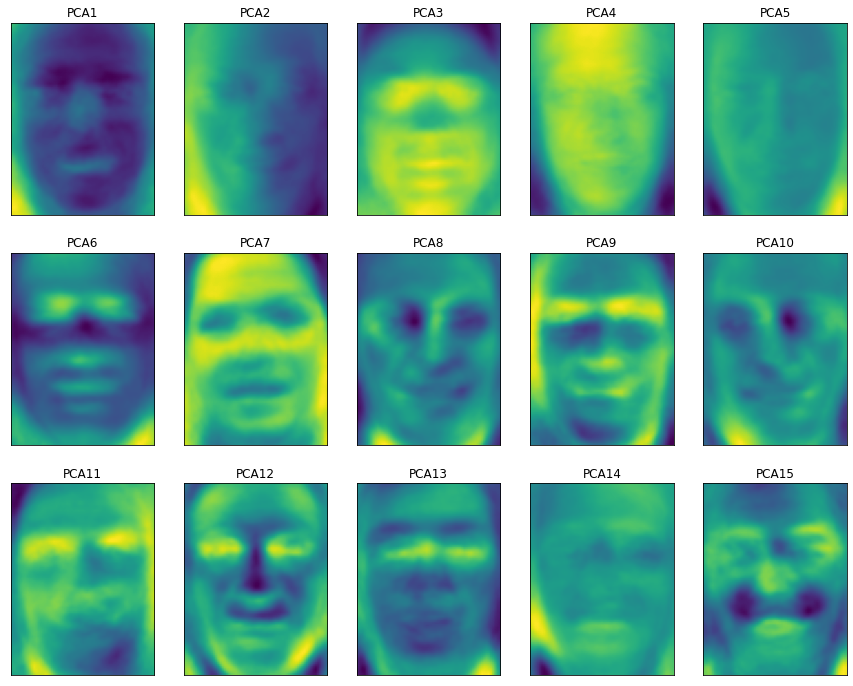

In [23]:
fig,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i, (component,ax) in enumerate(zip(pca.components_,axes.ravel())):
  ax.imshow(component.reshape(image.shape),cmap='viridis')
  ax.set_title("PCA{}".format((i+1)))

# 시각화를 통해서 살펴본 주성분을 완전하게 이해할 순 없지만 몇몇 주성분이 잡아낸 얼굴 이미지의 특징을 짐작해볼 수 있음.
# 예) PCA1 - 얼굴과 배경의 명암 차이를 기록한 것으로 보임.
# 예) PCA2 - 오른쪽과 왼쪽 조명의 차이를 담고 있는 것으로 보임.
# PCA모델기반 픽셀은 원본 픽셀 값을 사용하는 것보다는 의미가 있지만 여전히 사람의 방식과는 차이가 큼.

In [24]:
# 주성분해석2) PCA변환을 해석할 수 있는 또 다른 방법 
# 테스트 포인트 (1x5,655)에 주성분의 전치행렬(5,655x100)을 곱하면 100개의 새로운 특성 값(PCA변환 뒤의 새로운 특성값)을 얻을 수 있음. 
# 이 새로운 특성값(1x100)에 주성분(100x5,655)을 곱하고 가중치 합으로 나타내면 원본 샘플(1x5,655)을 얻을 수 있음.
# 결과, PCA변환 뒤의 얻은 새로운 특성값과 주성분의 가중치 합으로 원본 샘플을 표현할 수 있다. 라고 말할 수내는 데 필요한 수치 을 찾는 것으로 해석할 수 있음.
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))


Saving 화면 캡처 2021-10-23 222135.jpg to 화면 캡처 2021-10-23 222135.jpg
User uploaded file "화면 캡처 2021-10-23 222135.jpg" with length 393707 bytes


In [25]:
from IPython.display import Image
Image('PCA.PNG')

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 5.7s, 0.1min


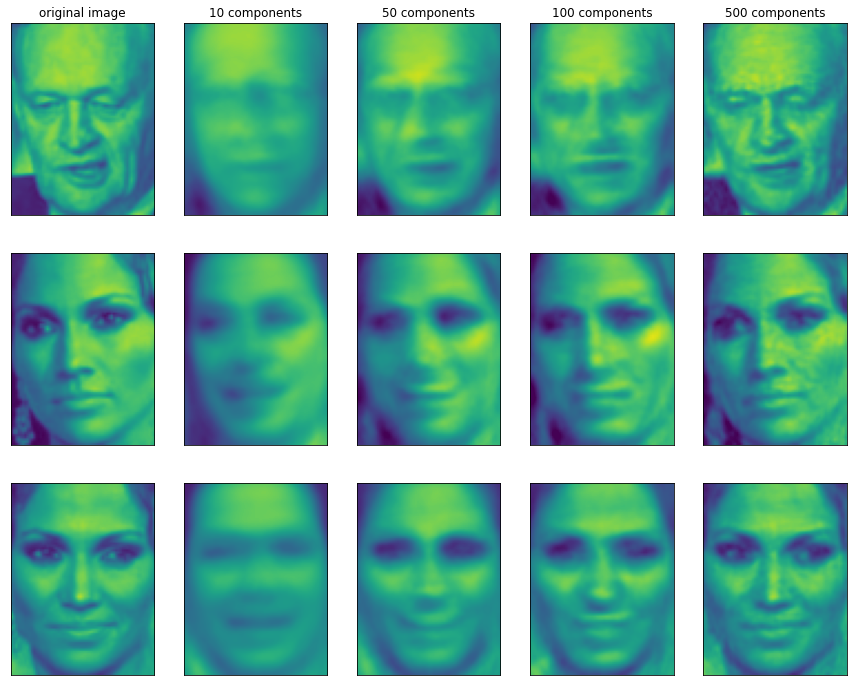

In [26]:
# 주성분해석3) PCA모델을 이해하는 또 다른 방법 (몇 개의 주성분을 사용해 원본 데이터를 재구성해보는 것)
# 예) 얼굴 이미지 데이터셋에서 몇 개의 주성분으로 데이터를 줄이고 원래 공간으로 되돌릴 수 있음.

# 주성분 개수에 따른 세 얼굴 이미지의 재구성
# 10,50,100,500개의 주성분을 사용해 얼굴 이미지를 재구성한 것
# 예) 주성분을 10개만 사용 (얼굴의 각도, 조명 같은 이미지의 기본 요소만 나타남)
# 예) 주성분을 더 많이 사용할수록 이미지가 더욱 상세해짐. 주성분을 픽셀 수 만큼 사용하면 이미지 완벽 재구성
mglearn.plots.plot_pca_faces(X_train,X_test,image.shape)

Text(0, 0.5, 'PCA2')

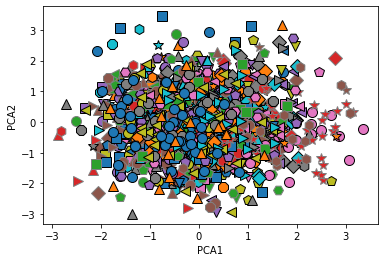

In [27]:
# PCA의 2개 주성분만을 이용해서 전체 데이터를 누구의 얼굴인지 클래스로 구분해서 산점도에 나타내봄
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
# 2개의 주성분만 사용하면 전체 데이터가 한 덩어리로 뭉쳐 있어 클래스가 잘 구분되지 않는 다는 것을 알 수 있음.
# 예) 10개의 주성분을 사용해도 PCA는 얼굴의 아주 대략적인 특징만 잡았기 때문에 아래 그래프는 당연함.